# Module 1.1: The Perceptron and Learning Rule (NumPy)

## Objectives
- Understand the perceptron, the simplest neural network unit.
- Learn the perceptron learning rule and how it updates weights.
- Implement a perceptron from scratch using NumPy.
- Apply the perceptron to a real dataset (Iris, binary classification).
- Visualize the decision boundary and learning process.

## Libraries Used
- numpy
- matplotlib
- scikit-learn (for loading the Iris dataset)

Install them with:
```bash
pip install numpy matplotlib scikit-learn
```

## Dataset
We will use the Iris dataset from scikit-learn. No manual download is needed.

## What You Will Learn
- How a perceptron works and its limitations
- How to train a perceptron using the learning rule
- How to visualize the decision boundary
- How to evaluate the perceptron's performance


## 1. What is a Perceptron?

A perceptron is the simplest type of artificial neuron. It takes several inputs, multiplies them by weights, sums them, adds a bias, and passes the result through an activation function (usually a step function).


Mathematically:

$$ y = \text{step}(w_1 x_1 + w_2 x_2 + ... + w_n x_n + b) $$


Where:

- $x_i$ are the inputs

- $w_i$ are the weights

- $b$ is the bias

- $\text{step}$ is the activation function (outputs 1 if input > 0, else 0)


Below is a diagram of a perceptron:

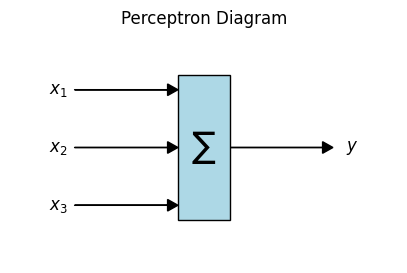

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5,3))
# Draw perceptron as a rectangle
rect = plt.Rectangle((-0.2, -0.5), 0.4, 1.0, color='lightblue', ec='k', zorder=10)
ax.add_patch(rect)
ax.text(0, 0, r'$\sum$', fontsize=18, ha='center', va='center', zorder=20, color='k')
# Draw input arrows (end at rectangle)
input_y = [0.4, 0, -0.4]
for i, y in enumerate(input_y):
    ax.arrow(-1, y, 0.8, 0, head_width=0.08, head_length=0.08, fc='k', ec='k', length_includes_head=True)
    ax.text(-1.2, y, f'$x_{{{i+1}}}$', fontsize=12, va='center')
# Draw output arrow (from rectangle)
ax.arrow(0.2, 0, 0.8, 0, head_width=0.08, head_length=0.08, fc='k', ec='k', length_includes_head=True)
ax.text(1.1, 0, '$y$', fontsize=12, va='center')
# Hide axes
ax.axis('off')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.8, 0.8)
plt.title('Perceptron Diagram')
plt.show()

## 2. The Perceptron Learning Rule

The perceptron learning rule is a simple algorithm to update the weights and bias so that the perceptron correctly classifies the training data. The update rule is:

$$ w_j \leftarrow w_j + \eta (y_{true} - y_{pred}) x_j $$

$$ b \leftarrow b + \eta (y_{true} - y_{pred}) $$

Where:

- $\eta$ is the learning rate (a small positive number)

- $y_{true}$ is the true label (0 or 1)

- $y_{pred}$ is the predicted label (0 or 1)

- $x_j$ is the input feature


The perceptron updates its weights only when it makes a mistake.

## 3. Implementing a Perceptron from Scratch

### Description of the Perceptron Class Methods and Variables

**Class:** `Perceptron`

**Variables:**
- `w`: NumPy array of shape `(n_features,)`. The weights for each input feature. Initialized to zeros.
- `b`: Float. The bias term. Initialized to zero.
- `lr`: Float. The learning rate, which controls how much the weights are updated during training.

**Methods:**
- `__init__(self, n_features, lr=0.1)`: Constructor. Initializes the weights, bias, and learning rate.
- `predict(self, x)`: Computes the weighted sum of the inputs plus bias, applies the step function, and returns the predicted class (0 or 1).
- `fit(self, X, y, epochs=10)`: Trains the perceptron on the dataset `X` (inputs) and `y` (labels) for a given number of epochs. Updates the weights and bias using the perceptron learning rule whenever a misclassification occurs.

This simple structure allows the perceptron to learn a linear decision boundary for binary classification tasks.

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, n_features, lr=0.01):
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.lr = lr
    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        return 1 if z > 0 else 0
    def fit(self, X, y, epochs=10):
        for epoch in range(epochs):
            # print(f"w: {self.w}")
            # print(f"b: {self.b}")
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                update = self.lr * (yi - y_pred)
                self.w += update * xi
                self.b += update

## 4. Loading and Preparing the Iris Dataset

We will use only two classes (setosa and versicolor) and two features (sepal length and petal length) for visualization.

### About the Dataset and Our Goal

The Iris dataset is a classic dataset in machine learning, containing measurements of 150 iris flowers from three species: setosa, versicolor, and virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width (all in cm).


For this experiment, we will use only two species (setosa and versicolor) and two features (sepal length and petal length) to make the problem visually interpretable and suitable for a perceptron (which can only solve linearly separable problems).


**Goal:**

- Train a perceptron to classify whether a flower is setosa or versicolor based on its sepal length and petal length.
- Visualize how the perceptron separates the two classes with a straight line (decision boundary).
- Evaluate the perceptron's performance on this simple binary classification task.

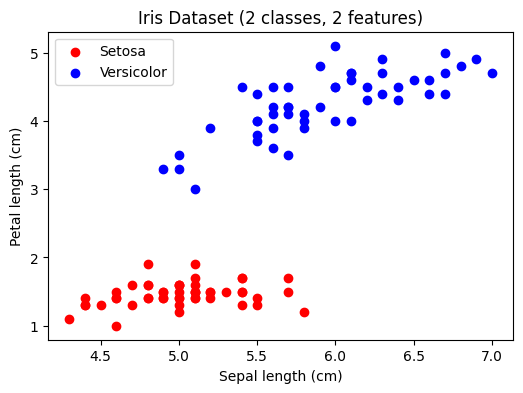

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # sepal length, petal length
y = iris.target

# Select only setosa and versicolor
mask = y < 2
X = X[mask]
y = y[mask]

# Visualize the data
plt.figure(figsize=(6,4))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Iris Dataset (2 classes, 2 features)')
plt.legend()
plt.show()

## 5. Training the Perceptron and Visualizing the Decision Boundary

Weights: [-0.35  0.92]
Bias: -0.2


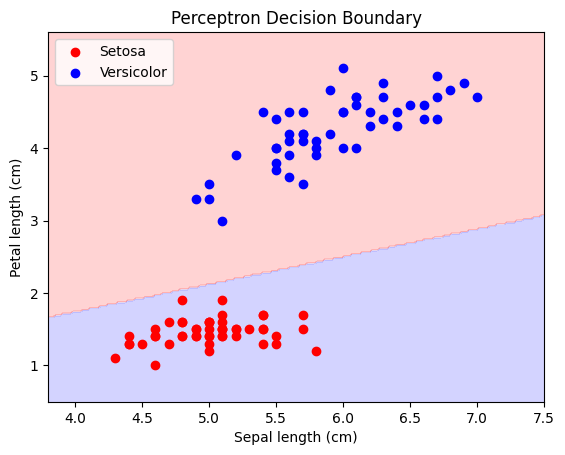

Accuracy: 100.00%


In [4]:
# Train perceptron
perceptron = Perceptron(n_features=2, lr=0.1)
perceptron.fit(X, y, epochs=20)
print("Weights:", perceptron.w)
print("Bias:", perceptron.b)
# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = np.array([model.predict([a, b]) for a, b in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bwr)
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Setosa')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Versicolor')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Petal length (cm)')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(perceptron, X, y)

# Compute accuracy
preds = np.array([perceptron.predict(xi) for xi in X])
acc = np.mean(preds == y)
print(f'Accuracy: {acc*100:.2f}%')

## 6. Limitations of the Perceptron

- The perceptron can only solve problems that are linearly separable (can be divided by a straight line).
- It cannot solve problems like XOR.
- Modern neural networks use more complex architectures and activation functions to overcome these limitations.

## Summary
- You learned how a perceptron works and how to implement it from scratch.
- You trained a perceptron on the Iris dataset and visualized its decision boundary.
- You saw the limitations of the perceptron and why we need more powerful models for complex problems.

You are now ready to move on to multilayer perceptrons (MLPs) and deeper networks!